In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from dmba import regressionSummary,plotDecisionTree
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pylab as plt
%matplotlib inline
from dmba import classificationSummary, regressionSummary



from sklearn.tree import DecisionTreeRegressor




In [2]:
df= pd.read_csv('Solar_dataset.csv')

In [3]:
print("The Data Frame Dimmensions are", df.shape)
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])
df.shape

The Data Frame Dimmensions are (21045, 17)
Number of rows: 21045
Number of columns: 17


(21045, 17)

In [4]:
df.columns

Index(['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude',
       'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
       'PolyPwr', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling'],
      dtype='object')

In [5]:
df.tail()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
21040,USAFA,20180928,1530,38.95,-104.83,1947,2.018090e+11,9,15,Fall,11.66992,43.22510,9.79611,14,10.0,802.3,722
21041,USAFA,20180929,1300,38.95,-104.83,1947,2.018090e+11,9,13,Fall,18.22510,28.98247,10.88992,13,10.0,799.2,722
21042,USAFA,20180929,1400,38.95,-104.83,1947,2.018090e+11,9,14,Fall,15.52124,33.49167,8.24479,10,10.0,798.4,722
21043,USAFA,20180929,1500,38.95,-104.83,1947,2.018090e+11,9,15,Fall,6.63452,51.62163,12.47328,10,10.0,797.8,722
21044,USAFA,20181001,1400,38.95,-104.83,1947,2.018100e+11,10,14,Fall,22.58301,32.83958,6.39732,15,10.0,801.2,110


In [6]:
df.dtypes

Location          object
Date               int64
Time               int64
Latitude         float64
Longitude        float64
Altitude           int64
YRMODAHRMI       float64
Month              int64
Hour               int64
Season            object
Humidity         float64
AmbientTemp      float64
PolyPwr          float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
dtype: object

In [7]:
# Change Season variable to 'category'. 
df.Season = df.Season.astype('category')
#Display category classes and category type.
print(' ')
print('Category levels and changed variable type:')
print(df.Season.cat.categories)
print(df.Season.dtype)  # Type is now 'category'.

 
Category levels and changed variable type:
Index(['Fall', 'Spring', 'Summer', 'Winter'], dtype='object')
category


In [8]:
df = df.drop(columns=['YRMODAHRMI','Location'])
print(df.dtypes)

Date                int64
Time                int64
Latitude          float64
Longitude         float64
Altitude            int64
Month               int64
Hour                int64
Season           category
Humidity          float64
AmbientTemp       float64
PolyPwr           float64
Wind.Speed          int64
Visibility        float64
Pressure          float64
Cloud.Ceiling       int64
dtype: object


In [9]:
print("The Data Frame Dimmensions after dropping undesired values", df.shape)
print('Number of rows after dropping undesired values:', df.shape[0])
print('Number of columns after dropping undesired values:', df.shape[1])
df.shape

The Data Frame Dimmensions after dropping undesired values (21045, 15)
Number of rows after dropping undesired values: 21045
Number of columns after dropping undesired values: 15


(21045, 15)

In [10]:
df = pd.get_dummies(df, prefix_sep='_',  drop_first=True)
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 'Month', 'Hour',
       'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [11]:
df.dtypes

Date               int64
Time               int64
Latitude         float64
Longitude        float64
Altitude           int64
Month              int64
Hour               int64
Humidity         float64
AmbientTemp      float64
PolyPwr          float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
Season_Spring      uint8
Season_Summer      uint8
Season_Winter      uint8
dtype: object

In [12]:
# We therefore strip trailing spaces and replace the remaining spaces 
# with an underscore '_'. Instead of using the `rename` method, we 
# create a modified copy of `columns` and assign to the `columns` 
# field of the dataframe.
print('Modified column titles with no space and one word for titles:')
df.columns = [s.strip().replace(' ', '_') for s in df.columns]
df.columns

Modified column titles with no space and one word for titles:


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 'Month', 'Hour',
       'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [13]:
df.isnull().count()

Date             21045
Time             21045
Latitude         21045
Longitude        21045
Altitude         21045
Month            21045
Hour             21045
Humidity         21045
AmbientTemp      21045
PolyPwr          21045
Wind.Speed       21045
Visibility       21045
Pressure         21045
Cloud.Ceiling    21045
Season_Spring    21045
Season_Summer    21045
Season_Winter    21045
dtype: int64

In [14]:
df.shape

(21045, 17)

In [15]:
df.dtypes

Date               int64
Time               int64
Latitude         float64
Longitude        float64
Altitude           int64
Month              int64
Hour               int64
Humidity         float64
AmbientTemp      float64
PolyPwr          float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
Season_Spring      uint8
Season_Summer      uint8
Season_Winter      uint8
dtype: object

In [18]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)


clean_dataset(df)


,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Season_Spring,Season_Summer,Season_Winter
0,20171203.0,1145.0,47.11,-122.57,84.0,12.0,11.0,81.71997,12.86919,2.42769,5.0,10.0,1010.6,722.0,0.0,0.0,1.0
1,20171203.0,1315.0,47.11,-122.57,84.0,12.0,13.0,96.64917,9.66415,2.46273,0.0,10.0,1011.3,23.0,0.0,0.0,1.0
2,20171203.0,1330.0,47.11,-122.57,84.0,12.0,13.0,93.61572,15.44983,4.46836,5.0,10.0,1011.6,32.0,0.0,0.0,1.0
3,20171204.0,1230.0,47.11,-122.57,84.0,12.0,12.0,77.21558,10.36659,1.65364,5.0,2.0,1024.4,6.0,0.0,0.0,1.0
4,20171204.0,1415.0,47.11,-122.57,84.0,12.0,14.0,54.80347,16.85471,6.57939,3.0,3.0,1023.7,9.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,20180928.0,1530.0,38.95,-104.83,1947.0,9.0,15.0,11.66992,43.22510,9.79611,14.0,10.0,802.3,722.0,0.0,0.0,0.0
21041,20180929.0,1300.0,38.95,-104.83,1947.0,9.0,13.0,18.22510,28.98247,10.88992,13.0,10.0,799.2,722.0,0.0,0.0,0.0
21042,20180929.0,1400.0,38.95,-104.83,1947.0,9.0,14.0,15.52124,33.49167,8.24479,10.0,10.0,798.4,722.0,0.0,0.0,0.0
21043,20180929.0,1500.0,38.95,-104.83,1947.0,9.0,15.0,6.63452,51.62163,12.47328,10.0,10.0,797.8,722.0,0.0,0.0,0.0


In [73]:
# Identify predictors and outcome of the regression model.
predictors = ['Date','Time','Latitude','Longitude','Altitude','Month','Hour',
       'Humidity', 'AmbientTemp',  'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling',
              'Season_Spring', 'Season_Summer',
      'Season_Winter'
             ]
outcome = 'PolyPwr'

# Identify X and y variables for regression and partition data
# using 70% of records for training and 30% for validation 
# (test_size=0.3). 
X = df[predictors]
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

# Create multiple linear regression model using X and y
# and LinearRegression() function from sklearn (skikit-learn) 
# library.
df_lm = LinearRegression()
df_lm.fit(train_X, train_y)

# Display intercept and regression coefficients. Round
# them to 2 decimals.
print('Regression Model for Solar Power Training Set')
print()
print('Intercept: ', np.round(df_lm.intercept_, 2)) # coefficient Bo
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': np.round(df_lm.coef_, 2)}))


Regression Model for Solar Power Training Set

Intercept:  1278.34
        Predictor  Coefficient
0            Date        -0.00
1            Time        -0.02
2        Latitude        -0.15
3       Longitude         0.04
4        Altitude        -0.00
5           Month        -0.31
6            Hour         2.51
7        Humidity        -0.06
8     AmbientTemp         0.19
9      Wind.Speed         0.07
10     Visibility         0.06
11       Pressure        -0.03
12  Cloud.Ceiling         0.00
13  Season_Spring         2.81
14  Season_Summer         2.36
15  Season_Winter        -1.66


In [20]:
# Use predict() to score (make) predictions for validation set.
df_lm_pred = df_lm.predict(valid_X)

# Develop and display data frame with actual values of Power Generated,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
print('Actual, Prediction, and Residual Power Generated for Validation Set')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': df_lm_pred, 
                       'Residual': valid_y - df_lm_pred}), 2)
print(result.head(10))

Actual, Prediction, and Residual Power Generated for Validation Set
       Actual  Predicted  Residual
13060   15.73      15.14      0.59
9909     5.55       6.76     -1.21
16300   12.85      12.64      0.21
10949   20.33      18.42      1.92
4344    25.26      10.87     14.39
6371     7.88      22.71    -14.83
21039   11.53      14.11     -2.58
18351   12.73      13.32     -0.59
8295     3.69       6.29     -2.59
875     17.28      18.56     -1.28


In [22]:
# Use predict() function to make predictions for
# training set.
pred_y = df_lm.predict(train_X)

# Create prediction performance measures for training set.
r2 = round(r2_score(train_y, pred_y),3)
adj_r2 = round(adjusted_r2_score(train_y, pred_y, df_lm),3)
aic = round(AIC_score(train_y, pred_y, df_lm),2)
bic = round(BIC_score(train_y, pred_y, df_lm),2)

# Display prediction performance measures for training set.
print('Prediction Performance Measures for Training Set')
print('r2 : ', r2)
print('Adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)
print() 

# Create prediction performance measures for validation set.
r2 = round(r2_score(valid_y, df_lm_pred),3)
adj_r2 = round(adjusted_r2_score(valid_y, df_lm_pred, df_lm),3)
aic = round(AIC_score(valid_y, df_lm_pred, df_lm),2)
bic = round(BIC_score(valid_y, df_lm_pred, df_lm),2)

# Display prediction performance measures for validation set.
print('Prediction Performance Measures for Validation Set')
print('r2 : ', r2)
print('adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)

Prediction Performance Measures for Training Set
r2 :  0.501
Adjusted r2 :  0.5
AIC :  89404.34
BIC :  89541.1

Prediction Performance Measures for Validation Set
r2 :  0.511
adjusted r2 :  0.509
AIC :  38281.33
BIC :  38402.84


In [23]:
# Display common accuracy measures for training set.
print('Accuracy Measures for Training Set - All Variables')
regressionSummary(train_y, pred_y)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set - All Variables')
regressionSummary(valid_y, df_lm_pred)

Accuracy Measures for Training Set - All Variables

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 5.0249
            Mean Absolute Error (MAE) : 3.9104
          Mean Percentage Error (MPE) : -45.6433
Mean Absolute Percentage Error (MAPE) : 71.1594

Accuracy Measures for Validation Set - All Variables

Regression statistics

                      Mean Error (ME) : 0.0119
       Root Mean Squared Error (RMSE) : 5.0012
            Mean Absolute Error (MAE) : 3.8836
          Mean Percentage Error (MPE) : -45.2431
Mean Absolute Percentage Error (MAPE) : 71.2129


In [24]:

# Develop dataframe with 3 new records. Notice that the 
# 'PolyPwr' output variable is not present in these records.
new_data = pd. DataFrame ({
'Date': [20171203,20181203,20191203],
'Time' : [1145, 1145,1145],
'Latitude': [47.11,47.11,47.11],
'Longitude': [-122.57, -122.57, -122.57],
'Altitude': [84,84,84],
'Month': [12,12,12],
'Hour': [11,11,11],
'Humidity': [0,40,85],#Low, medium and high humidity
'AmbientTemp': [0,15,40], #Low, medium and high Temperaature
'Wind.Speed': [0,0,0], #negligible Wind
'Visibility': [10,10,10],
'Pressure': [1010.6,1010.6,1010.6],
'Cloud.Ceiling': [722,722,722],
'Season_Spring': [0,0,0],
'Season Summer': [1,1,1],
'Season_Winter': [0,0,0]
})

# Use predict() function to make predictions for 
# new Power Generated data using regression model 
# and round them to 2 decimals.
pred_power = np.round(df_lm.predict(new_data), 2)

# Display new data and display 'PolyPwr' prediction 
# for each record.
pred_power_result= pd. DataFrame ({
'Date': [20171203,20181203,20191203],
'Time' : [1145, 1145,1145],
'Latitude': [47.11,47.11,47.11],
'Longitude': [-122.57, -122.57, -122.57],
'Altitude': [84,84,84],
'Month': [12,12,12],
'Hour': [11,11,11],
'Humidity': [0,40,85],#Low, medium and high humidity
'AmbientTemp': [0,15,40], #Low, medium and high Temperaature
'Wind.Speed': [0,0,0], #negligible Wind
'Visibility': [10,10,10],
'Pressure': [1010.6,1010.6,1010.6],
'Cloud.Ceiling': [722,722,722],
'Season_Spring': [0,0,0],
'Season Summer': [1,1,1],
'Season_Winter': [0,0,0],
'Predicted Power': pred_power,
})

print('New Power Generated Data and Predictions for New Data')
print(pred_power_result)

New Power Generated Data and Predictions for New Data
       Date  Time  Latitude  Longitude  Altitude  Month  Hour  Humidity  \
0  20171203  1145     47.11    -122.57        84     12    11         0   
1  20181203  1145     47.11    -122.57        84     12    11        40   
2  20191203  1145     47.11    -122.57        84     12    11        85   

   AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  \
0            0           0          10    1010.6            722   
1           15           0          10    1010.6            722   
2           40           0          10    1010.6            722   

   Season_Spring  Season Summer  Season_Winter  Predicted Power  
0              0              1              0             7.80  
1              0              1              0             7.62  
2              0              1              0             9.00  


C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Season Summer
Feature names seen at fit time, yet now missing:
- Season_Summer

  warnings.warn(message, FutureWarning)


# Backward elimination Algorithm

In [75]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: Date, Time, Latitude, Longitude, Altitude, Month, Hour, Humidity, AmbientTemp, Wind.Speed, Visibility, Pressure, Cloud.Ceiling, Season_Spring, Season_Summer, Season_Winter
Start: score=89404.34
Step: score=89404.34, remove None

Best Variables from Backward Elimination Algorithm
['Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 'Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'Season_Spring', 'Season_Summer', 'Season_Winter']


In [26]:
# Develop the multiple linear regression model based
# on the Backward Elimination results.

# Identify predictors and outcome of the regression model.
predictors_be = ['Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 
                 'Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 
                 'Pressure', 'Cloud.Ceiling', 'Season_Spring', 'Season_Summer', 'Season_Winter']
outcome = 'PolyPwr'

# Identify X and y variables for regression and partition data
# using 70% of records for training and 30% for validation 
# (test_size=0.4). 
X = df[predictors_be]
y = df[outcome]
train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.3, random_state=1)

# Create multiple linear regression model using X and y.
df_be = LinearRegression()
df_be.fit(train_X_be, train_y_be)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Backward Elimination')
print()
print('Intercept ', np.round(df_be.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(df_be.coef_, 2)}))


Regression Model for Training Set Using Backward Elimination

Intercept  1267.28
        Predictor  Coefficient
0            Date        -0.00
1            Time        -0.03
2        Latitude        -0.15
3       Longitude         0.04
4        Altitude        -0.01
5           Month        -0.31
6            Hour         2.57
7        Humidity        -0.06
8     AmbientTemp         0.19
9      Wind.Speed         0.07
10       Pressure        -0.03
11  Cloud.Ceiling         0.00
12  Season_Spring         2.80
13  Season_Summer         2.35
14  Season_Winter        -1.67


In [27]:
# Use predict() to score predictions for validation set in
# regression model based Backward Elimination algorithm.
df_be_pred = df_be.predict(valid_X_be)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_be,'Predicted': df_be_pred, 
                       'Residual': valid_y_be - df_be_pred}), 2)
print()
print('Predictions for Validation Set Using Backward Elimination')
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Backward Elimination')
regressionSummary(valid_y_be, df_be_pred)


Predictions for Validation Set Using Backward Elimination
       Actual  Predicted  Residual
13060   15.73      15.15      0.58
9909     5.55       6.72     -1.17
16300   12.85      12.63      0.21
10949   20.33      18.43      1.91
4344    25.26      10.84     14.42
6371     7.88      22.71    -14.84
21039   11.53      14.11     -2.58
18351   12.73      13.31     -0.58
8295     3.69       6.24     -2.54
875     17.28      18.91     -1.63

Accuracy Measures for Validation Set Using Backward Elimination

Regression statistics

                      Mean Error (ME) : 0.0114
       Root Mean Squared Error (RMSE) : 5.0004
            Mean Absolute Error (MAE) : 3.8818
          Mean Percentage Error (MPE) : -45.3104
Mean Absolute Percentage Error (MAPE) : 71.1141


# Foward Selection Algorithm

In [76]:
# Define train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: Date, Time, Latitude, Longitude, Altitude, Month, Hour, Humidity, AmbientTemp, Wind.Speed, Visibility, Pressure, Cloud.Ceiling, Season_Spring, Season_Summer, Season_Winter
Start: score=99604.05, constant
Step: score=93603.18, add AmbientTemp
Step: score=92332.65, add Cloud.Ceiling
Step: score=91368.26, add Season_Spring
Step: score=90950.62, add Altitude
Step: score=90592.24, add Season_Summer
Step: score=90373.44, add Latitude
Step: score=89967.83, add Humidity
Step: score=89814.71, add Longitude
Step: score=89673.93, add Wind.Speed
Step: score=89590.10, add Month
Step: score=89485.77, add Season_Winter
Step: score=89462.73, add Date
Step: score=89448.15, add Pressure
Step: score=89444.62, add Visibility
Step: score=89444.62, add None

Best Variables from Forward Selection Algorithm
['AmbientTemp', 'Cloud.Ceiling', 'Season_Spring', 'Altitude', 'Season_Summer', 'Latitude', 'Humidity', 'Longitude', 'Wind.Speed', 'Month', 'Season_Winter', 'Date', 'Pressure', 'Visibility']


In [29]:
# Develop the multiple linear regression model based
# on the Forward Selection results.

# Identify predictors and outcome of the regression model.
predictors_fs = ['AmbientTemp', 'Cloud.Ceiling', 'Season_Spring',
                 'Altitude', 'Season_Summer', 'Latitude', 'Humidity', 'Longitude', 
                 'Wind.Speed', 'Month', 'Season_Winter', 'Pressure', 'Date', 'Visibility']
outcome = 'PolyPwr'

# Identify X and y variables for regression and partition data
# using 70% of records for training and 30% for validation 
# (test_size=0.3). 
X = df[predictors_fs]
y = df[outcome]
train_X_fs, valid_X_fs, train_y_fs, valid_y_fs = \
          train_test_split(X, y, test_size=0.3, random_state=1)

# Create multiple linear regression model using X and y.
df_fs = LinearRegression()
df_fs.fit(train_X_fs, train_y_fs)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Forward Selection')
print()
print('Intercept ', np.round(df_fs.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(df_fs.coef_, 2)}))

Regression Model for Training Set Using Forward Selection

Intercept  1246.93
        Predictor  Coefficient
0     AmbientTemp         0.18
1   Cloud.Ceiling         0.01
2   Season_Spring         2.79
3        Altitude        -0.00
4   Season_Summer         2.37
5        Latitude        -0.16
6        Humidity        -0.06
7       Longitude         0.04
8      Wind.Speed         0.07
9           Month        -0.31
10  Season_Winter        -1.68
11       Pressure        -0.03
12           Date        -0.00
13     Visibility         0.08


In [77]:
# Use predict() to score predictions for validation set.
df_fs_pred = df_fs.predict(valid_X_fs)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_fs,'Predicted': df_fs_pred, 
                       'Residual': valid_y_fs - df_fs_pred}), 2)
print()
print('Predictions for Validation Set Using Forward Selection')
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Forward Selection')
regressionSummary(valid_y_fs, df_fs_pred)


Predictions for Validation Set Using Forward Selection
       Actual  Predicted  Residual
13060   15.73      15.04      0.70
9909     5.55       7.38     -1.83
16300   12.85      12.61      0.23
10949   20.33      18.42      1.92
4344    25.26      11.05     14.21
6371     7.88      22.61    -14.74
21039   11.53      14.35     -2.82
18351   12.73      13.27     -0.55
8295     3.69       6.20     -2.51
875     17.28      18.40     -1.12

Accuracy Measures for Validation Set Using Forward Selection

Regression statistics

                      Mean Error (ME) : 0.0166
       Root Mean Squared Error (RMSE) : 5.0039
            Mean Absolute Error (MAE) : 3.8872
          Mean Percentage Error (MPE) : -45.3053
Mean Absolute Percentage Error (MAPE) : 71.2022


# Stepwise Algorithm

In [31]:
# Define train_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use stepwise() function to identify the best_model
# and best_variables with Stepwise section algorithm.
best_model_st, best_variables_st = stepwise_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Stepwise algorithm.
print()
print('Best Variables from Stepwise Selection Algorithm')
print(best_variables_st)

Variables: Date, Time, Latitude, Longitude, Altitude, Month, Hour, Humidity, AmbientTemp, Wind.Speed, Visibility, Pressure, Cloud.Ceiling, Season_Spring, Season_Summer, Season_Winter
Start: score=99604.05, constant
Step: score=93603.18, add AmbientTemp
Step: score=92332.65, add Cloud.Ceiling
Step: score=91368.26, add Season_Spring
Step: score=90950.62, add Altitude
Step: score=90592.24, add Season_Summer
Step: score=90373.44, add Latitude
Step: score=89967.83, add Humidity
Step: score=89814.71, add Longitude
Step: score=89673.93, add Wind.Speed
Step: score=89590.10, add Month
Step: score=89485.77, add Season_Winter
Step: score=89462.73, add Date
Step: score=89448.15, add Pressure
Step: score=89444.62, add Visibility
Step: score=89444.62, unchanged None

Best Variables from Stepwise Selection Algorithm
['AmbientTemp', 'Cloud.Ceiling', 'Season_Spring', 'Altitude', 'Season_Summer', 'Latitude', 'Humidity', 'Longitude', 'Wind.Speed', 'Month', 'Season_Winter', 'Date', 'Pressure', 'Visibility

In [32]:
# Develop the multiple linear regression model based
# on the Stepwise Selection results.

# Identify predictors and outcome of the regression model.
predictors_st = ['AmbientTemp', 'Cloud.Ceiling', 'Season_Spring', 
                 'Altitude', 'Season_Summer', 'Latitude', 'Humidity',
                 'Longitude', 'Wind.Speed', 'Month', 'Season_Winter', 
                 'Pressure', 'Date', 'Visibility']
outcome = 'PolyPwr'

# Identify X and y variables for regression and partition data
# using 70% of records for training and 30% for validation 
# (test_size=0.3). 
X = df[predictors_st]
y = df[outcome]
train_X_st, valid_X_st, train_y_st, valid_y_st = \
          train_test_split(X, y, test_size=0.3, random_state=1)

# Create multiple linear regression model using X and y.
df_st = LinearRegression()
df_st.fit(train_X_st, train_y_st)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Stewise Selection')
print()
print('Intercept ', np.round(df_st.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(df_st.coef_, 2)}))

Regression Model for Training Set Using Stewise Selection

Intercept  1246.93
        Predictor  Coefficient
0     AmbientTemp         0.18
1   Cloud.Ceiling         0.01
2   Season_Spring         2.79
3        Altitude        -0.00
4   Season_Summer         2.37
5        Latitude        -0.16
6        Humidity        -0.06
7       Longitude         0.04
8      Wind.Speed         0.07
9           Month        -0.31
10  Season_Winter        -1.68
11       Pressure        -0.03
12           Date        -0.00
13     Visibility         0.08


In [78]:
# Use predict() to score predictions for validation set 
# using Stepwise algorithm.
df_st_pred = df_st.predict(valid_X_st)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_st,'Predicted': df_st_pred, 
                       'Residual': valid_y_st - df_st_pred}), 2)
print()
print('Predictions for Validation Set Using Stepwise Selection')
print(result.head(10))
# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Stepwise Selection')
regressionSummary(valid_y_st, df_st_pred)





Predictions for Validation Set Using Stepwise Selection
       Actual  Predicted  Residual
13060   15.73      15.04      0.70
9909     5.55       7.38     -1.83
16300   12.85      12.61      0.23
10949   20.33      18.42      1.92
4344    25.26      11.05     14.21
6371     7.88      22.61    -14.74
21039   11.53      14.35     -2.82
18351   12.73      13.27     -0.55
8295     3.69       6.20     -2.51
875     17.28      18.40     -1.12

Accuracy Measures for Validation Set Using Stepwise Selection

Regression statistics

                      Mean Error (ME) : 0.0166
       Root Mean Squared Error (RMSE) : 5.0039
            Mean Absolute Error (MAE) : 3.8872
          Mean Percentage Error (MPE) : -45.3053
Mean Absolute Percentage Error (MAPE) : 71.2022


# Decision Tree

In [84]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 10)), 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 
                   0.004, 0.005], 
    'min_samples_split': list(range(10, 30)), 
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeRegressor() new parameters. 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of regression tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.5671
Improved parameters:  {'max_depth': 9, 'min_impurity_decrease': 0, 'min_samples_split': 28}


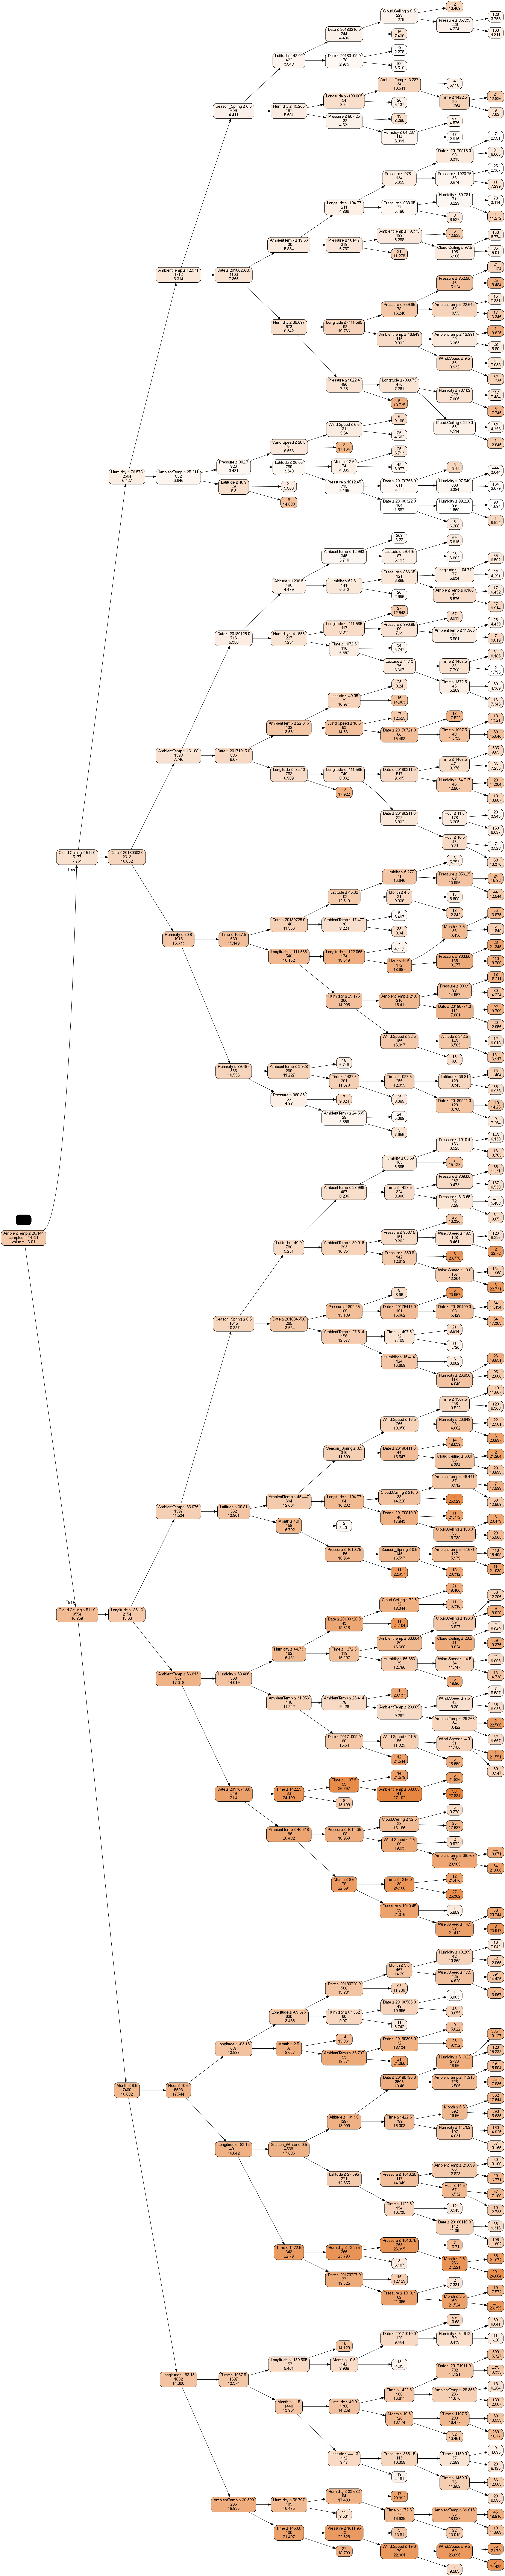

In [37]:
# Create regression tree based on the improved parameters. 
bestRegTree = gridSearch.best_estimator_

# Display regression tree bestRegTree based on the best 
# parameters from grid search.
plotDecisionTree(bestRegTree, feature_names=train_X.columns, rotate=True)

In [38]:
# Identify and display number of nodes in the regression tree. 
tree_nodes = bestRegTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 489


In [39]:
# Regression tree accuracy measures for training and
# validation partitions. 

# Identify and display regression tree accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Regression Tree')
regressionSummary(train_y, bestRegTree.predict(train_X))

# Identify and display regression tree accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
regressionSummary(valid_y, bestRegTree.predict(valid_X))

Accuracy Measures for Training Partition for Regression Tree

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 4.0929
            Mean Absolute Error (MAE) : 2.8615
          Mean Percentage Error (MPE) : -31.9717
Mean Absolute Percentage Error (MAPE) : 49.5771

Accuracy Measures for Validation Partition for Regression Tree

Regression statistics

                      Mean Error (ME) : -0.0179
       Root Mean Squared Error (RMSE) : 4.6020
            Mean Absolute Error (MAE) : 3.1935
          Mean Percentage Error (MPE) : -35.5112
Mean Absolute Percentage Error (MAPE) : 54.9150


In [79]:
# Make predictions for new data using Toyota Corolla tree. 

# Develop dataframe with 2 new records. 
# Notice that the 'Price' output variable
# is not present in these records.
new_data = pd. DataFrame ({
'Date': [20171203,20181203,20191203],
'Time' : [1145, 1145,1145],
'Latitude': [47.11,47.11,47.11],
'Longitude': [-122.57, -122.57, -122.57],
'Altitude': [84,84,84],
'Month': [12,12,12],
'Hour': [11,11,11],
'Humidity': [0,40,85],#Low, medium and high humidity
'AmbientTemp': [0,15,40], #Low, medium and high Temperaature
'Wind.Speed': [0,0,0], #negligible Wind
'Visibility': [10,10,10],
'Pressure': [1010.6,1010.6,1010.6],
'Cloud.Ceiling': [722,722,722],
'Season_Spring': [0,0,0],
'Season Summer': [1,1,1],
'Season_Winter': [0,0,0]
})

# Make predictions for new Toyota Corolla data using
# regression tree and round them to 2 decimals.
pred_power_tree = bestRegTree.predict(new_data)
pred_power_tree = np.round(pred_power_tree, decimals=2)

# Display new data and display 'Price' prediction 
# for each record.
pred_power_result = pd. DataFrame ({
'Date': [20171203,20181203,20191203],
'Time' : [1145, 1145,1145],
'Latitude': [47.11,47.11,47.11],
'Longitude': [-122.57, -122.57, -122.57],
'Altitude': [84,84,84],
'Month': [12,12,12],
'Hour': [11,11,11],
'Humidity': [0,40,85],#Low, medium and high humidity
'AmbientTemp': [0,15,40], #Low, medium and high Temperaature
'Wind.Speed': [0,0,0], #negligible Wind
'Visibility': [10,10,10],
'Pressure': [1010.6,1010.6,1010.6],
'Cloud.Ceiling': [722,722,722],
'Season_Spring': [0,0,0],
'Season Summer': [1,1,1],
'Season_Winter': [0,0,0],
'Predicted Power': pred_power_tree,
})

print('New Energy Production Predictions for New Data')
print(pred_power_result)

New Energy Production Predictions for New Data
       Date  Time  Latitude  Longitude  Altitude  Month  Hour  Humidity  \
0  20171203  1145     47.11    -122.57        84     12    11         0   
1  20181203  1145     47.11    -122.57        84     12    11        40   
2  20191203  1145     47.11    -122.57        84     12    11        85   

   AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  \
0            0           0          10    1010.6            722   
1           15           0          10    1010.6            722   
2           40           0          10    1010.6            722   

   Season_Spring  Season Summer  Season_Winter  Predicted Power  
0              0              1              0             3.22  
1              0              1              0             4.12  
2              0              1              0             4.19  


C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Season Summer
Feature names seen at fit time, yet now missing:
- Season_Summer

  warnings.warn(message, FutureWarning)


# KNN

In [81]:


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

from math import sqrt
from dmba import regressionSummary

import matplotlib.pylab as plt
%matplotlib inline


In [82]:
# Develop standardized (normalized) data for the training and 
# validation partitions for k-NN regressor model.

# Create scaler object using StandardScaler() function. 
scaler = StandardScaler()

# Transform training and validation predictors into scaled 
# (normalized) values (train_X_scaled), and create a data 
# frame based on the transformed values. 
train_X_scaled = scaler.fit_transform(train_X)

train_X_s = pd.DataFrame(train_X_scaled, 
                columns=['Norm_Date', 'Norm_Time', 'Norm_Latitude', 'Norm_Longitude', 'Norm_Altitude', 'Norm_Month', 'Norm_Hour',
       'Norm_Humidity', 'Norm_AmbientTemp',  'Norm_Wind.Speed', 'Norm_Visibility',
       'Norm_Pressure', 'Norm_Cloud.Ceiling', 'Norm_Season_Spring', 'Norm_Season_Summer',
       'Norm_Season_Winter'])


valid_X_scaled = scaler.fit_transform(valid_X)
valid_X_s = pd.DataFrame(valid_X_scaled,
                columns=['Norm_Date', 'Norm_Time', 'Norm_Latitude', 'Norm_Longitude', 'Norm_Altitude', 'Norm_Month', 'Norm_Hour',
       'Norm_Humidity', 'Norm_AmbientTemp',  'Norm_Wind.Speed', 'Norm_Visibility',
       'Norm_Pressure', 'Norm_Cloud.Ceiling', 'Norm_Season_Spring', 'Norm_Season_Summer',
       'Norm_Season_Winter'])

#Display training partition shape (number of records, number of columns)
print('Number of Records and Columns in Training and Validation Partitions')
print(train_X_s.shape, valid_X_s.shape)

# Display normalized training partition records. 
print()
print('Training Partition Records')
print(train_X_s)

#print()
#print('Validation Partition Records')
#print(valid_X_s)


Number of Records and Columns in Training and Validation Partitions
(14731, 16) (6314, 16)

Training Partition Records
       Norm_Date  Norm_Time  Norm_Latitude  Norm_Longitude  Norm_Altitude  \
0       0.814069  -0.406932      -0.002864       -0.787644      -1.032156   
1       0.679791   1.384857       0.470991       -0.203656       0.740164   
2       0.635032   0.787594       1.415529       -0.849277      -0.924703   
3       0.639399   1.474446       0.470991       -0.203656       0.740164   
4      -1.372795  -0.406932      -0.677987       -0.525246      -0.440519   
...          ...        ...            ...             ...            ...   
14726   0.748568   0.787594      -0.677987       -0.525246      -0.440519   
14727   0.678045   0.787594      -0.002864       -0.787644      -1.032156   
14728  -1.418427   1.384857      -1.774666        1.741751      -1.030861   
14729   0.813850   1.384857       1.063704        0.942963      -0.714976   
14730   0.659923  -0.825017       

In [83]:
# Develop k-NN regressor model using training partition for various
# values of k and then identify RMSE for each model 
# using validation partition.
results_rmse = [] #to store rmse values for different k
for k in range(1, 21):
    # Create k-NN model for different k in training partition.
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn_model.fit(train_X_s, train_y) 
    
    # Make k-NN model predictions using validation partition.
    knn_pred = knn_model.predict(valid_X_s)
    
    # calculate RMSE for predictions in validation partition.
    RMSE = sqrt(mean_squared_error(valid_y, knn_pred))
    
    # Develop output resuts with each k and respective RMSE.
    results_rmse.append({
        'k': k,
        'RMSE': RMSE
    })
    
# Convert results_rmse to a pandas data frame and display 
# data frame. 
results = pd.DataFrame(results_rmse)
print(results)

     k      RMSE
0    1  5.760585
1    2  5.010041
2    3  4.775166
3    4  4.613358
4    5  4.577514
5    6  4.514748
6    7  4.488816
7    8  4.475244
8    9  4.443029
9   10  4.419023
10  11  4.413276
11  12  4.413391
12  13  4.406483
13  14  4.404697
14  15  4.396102
15  16  4.401611
16  17  4.402713
17  18  4.403944
18  19  4.410775
19  20  4.420634


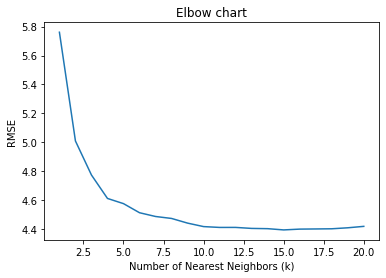

In [46]:
# Develop and display Elbow chart to compare RMSE with 
# number of nearest neighbors, k, from 1 to 20. 
ax = results.plot(x='k', y='RMSE')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('RMSE')

plt.title('Elbow chart')
ax.legend().set_visible(False)
plt.show()

In [47]:
# Develop k-NN regressor model using KNeighborsRegressor()
# function and best number of nearest neighbors, k = 11
knn = neighbors.KNeighborsRegressor(n_neighbors=11)
knn.fit(train_X_s, train_y)

KNeighborsRegressor(n_neighbors=11)

In [80]:
# Make predictions using k-NN model. 
# Use predict() to score (make) predictions for validation set.
knn_valid_pred = knn.predict(valid_X_s)

# Use predict() function to make predictions for
# training set.
knn_train_pred = knn.predict(train_X_s)

# Display common accuracy measures for training set.
print('Accuracy Measures for Training Set')
regressionSummary(train_y, knn_train_pred)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set')
regressionSummary(valid_y, knn_valid_pred)

Accuracy Measures for Training Set

Regression statistics

                      Mean Error (ME) : -0.1332
       Root Mean Squared Error (RMSE) : 4.0305
            Mean Absolute Error (MAE) : 2.7581
          Mean Percentage Error (MPE) : -34.4365
Mean Absolute Percentage Error (MAPE) : 50.1644

Accuracy Measures for Validation Set

Regression statistics

                      Mean Error (ME) : -0.2709
       Root Mean Squared Error (RMSE) : 4.4133
            Mean Absolute Error (MAE) : 3.0193
          Mean Percentage Error (MPE) : -40.1227
Mean Absolute Percentage Error (MAPE) : 56.5267


In [50]:
# Make predictions for two new Toyota Corolla records. 

# Develop dataframe with 2 new records. Notice that the 
# 'Price' output variable is not present in these records.
new_data = pd. DataFrame ({
'Date': [20171203,20181203,20191203],
'Time' : [1145, 1145,1145],
'Latitude': [47.11,47.11,47.11],
'Longitude': [-122.57, -122.57, -122.57],
'Altitude': [84,84,84],
'Month': [12,12,12],
'Hour': [11,11,11],
'Humidity': [0,40,85],#Low, medium and high humidity
'AmbientTemp': [0,15,40], #Low, medium and high Temperaature
'Wind.Speed': [0,0,0], #negligible Wind
'Visibility': [10,10,10],
'Pressure': [1010.6,1010.6,1010.6],
'Cloud.Ceiling': [722,722,722],
'Season_Spring': [0,0,0],
'Season Summer': [1,1,1],
'Season_Winter': [0,0,0]
})

# Apply standard scalre to conver the new data into
# standardize (normalized) format.
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)
new_data_s = pd.DataFrame(new_data_scaled)

# Use predict() function to make predictions for 
# new Toyota Corolla data using regression model 
# and round them to 2 decimals.
knn_pred = np.round(knn.predict(new_data_s), 2)

# Display new data and display 'Price' prediction 
# for each record.
pred_result = pd. DataFrame ({
'Date': [20171203,20181203,20191203],
'Time' : [1145, 1145,1145],
'Latitude': [47.11,47.11,47.11],
'Longitude': [-122.57, -122.57, -122.57],
'Altitude': [84,84,84],
'Month': [12,12,12],
'Hour': [11,11,11],
'Humidity': [0,40,85],#Low, medium and high humidity
'AmbientTemp': [0,15,40], #Low, medium and high Temperaature
'Wind.Speed': [0,0,0], #negligible Wind
'Visibility': [10,10,10],
'Pressure': [1010.6,1010.6,1010.6],
'Cloud.Ceiling': [722,722,722],
'Season_Spring': [0,0,0],
'Season Summer': [1,1,1],
'Season_Winter': [0,0,0],
'Predicted Price': knn_pred,
})

print('New Power Generated Data and Predictions for New Data')
print(pred_result)

New Power Generated Data and Predictions for New Data
       Date  Time  Latitude  Longitude  Altitude  Month  Hour  Humidity  \
0  20171203  1145     47.11    -122.57        84     12    11         0   
1  20181203  1145     47.11    -122.57        84     12    11        40   
2  20191203  1145     47.11    -122.57        84     12    11        85   

   AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  \
0            0           0          10    1010.6            722   
1           15           0          10    1010.6            722   
2           40           0          10    1010.6            722   

   Season_Spring  Season Summer  Season_Winter  Predicted Price  
0              0              1              0            16.67  
1              0              1              0            16.57  
2              0              1              0            18.42  


C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# Neural Networks

In [61]:


from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import StandardScaler

from dmba import regressionSummary

%matplotlib inline
import matplotlib.pylab as plt

In [62]:
# Scale input data (predictors) for training  and validation 
# partitions using StandardScaler().
sc_X = StandardScaler()
train_X_sc = sc_X.fit_transform(train_X)
valid_X_sc = sc_X.transform(valid_X)

# Develop a data frame to display scaled predictors for 
# training partition. Round scaled values to 3 decimals.
# Add coloumn titles to data frame.
train_X_sc_df = np.round(pd.DataFrame(train_X_sc), decimals=3)                            
train_X_sc_df.columns=['Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 'Month', 'Hour',
       'Humidity', 'AmbientTemp',  'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling', 'Season_Spring', 'Season_Summer',
       'Season_Winter']


# Display scaled predictors for training partition.
print()
print('Scaled Predictors for Training Partition')
print(train_X_sc_df.head(10))


Scaled Predictors for Training Partition
    Date   Time  Latitude  Longitude  Altitude  Month   Hour  Humidity  \
0  0.814 -0.407    -0.003     -0.788    -1.032  0.815 -0.380    -0.706   
1  0.680  1.385     0.471     -0.204     0.740 -1.196  1.416    -0.731   
2  0.635  0.788     1.416     -0.849    -0.925 -1.866  0.817    -0.210   
3  0.639  1.474     0.471     -0.204     0.740 -1.866  1.416     0.142   
4 -1.373 -0.407    -0.678     -0.525    -0.441  0.815 -0.380    -0.785   
5 -1.326  1.385     0.102      0.241     1.399  1.485  1.416    -1.149   
6  0.790  0.190     1.416     -0.849    -0.925  0.480  0.219    -0.974   
7  0.790  0.877     0.122      0.233     1.487  0.480  0.817    -0.616   
8 -1.352  0.190    -0.678     -0.525    -0.441  1.150  0.219    -1.195   
9  0.745  1.564     1.416     -0.849    -0.925 -0.190  1.416     0.534   

   AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  \
0        0.549      -1.618       0.220     1.019          0.679   
1       -

In [68]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPRegressor(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)


Best score:0.0112
Best parameter:  {'hidden_layer_sizes': 12}


In [69]:
df_reg = MLPRegressor(hidden_layer_sizes=(12), 
                solver='lbfgs', max_iter=10000, random_state=1)
df_reg.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Power Generator Neural Network Model')
print(df_reg.intercepts_)

print()
print('Network Weights for Power Generator Neural Network Model')
print(df_reg.coefs_)


Final Intercepts for Power Generator Neural Network Model
[array([ 1.20661026,  2.09903816,  2.45870282,  2.0178816 ,  0.17855023,
       -2.53404861, -0.73108013,  3.29098184,  0.36845999, -0.4099521 ,
        0.94212352,  0.90130114]), array([-8.29431991])]

Network Weights for Power Generator Neural Network Model
[array([[-8.86382074e-01,  3.44071082e+00, -1.57204130e+00,
        -4.21252773e-01, -1.58892460e-02, -5.02510078e-01,
        -2.12787468e-01,  4.85645572e-01, -6.82943097e-02,
        -8.62444017e-01,  4.89788060e-01,  7.00854407e-03],
       [-1.46200627e-01,  1.42613644e+00,  2.73823665e+00,
         3.19454040e-01, -2.28928068e+00, -5.14167797e-01,
         1.40184146e+00, -8.32404854e-01,  1.23843846e+00,
        -2.78198821e+00,  5.11779095e+00, -7.09796221e-01],
       [-3.29908022e-01, -7.21063984e-01, -1.08659729e+00,
         3.66163373e-01, -2.16741786e-01,  1.29308100e+00,
         1.46912473e-01,  8.09100793e-02, -6.86508778e-01,
         1.37292205e-01, -4.84

In [70]:
# for validation set.
power_pred = np.round(df_reg.predict(valid_X_sc), decimals=2)

# Create data frame to display prediction results for
# validation set. 
power_pred_result = pd.DataFrame({'Actual': valid_y, 
                'Prediction': power_pred, 'Residual': valid_y-power_pred})

print('Predictions for Power Generation in Validation Partition') 
print(power_pred_result.head(10))

Predictions for Power Generation in Validation Partition
         Actual  Prediction  Residual
13060  15.73394       15.42   0.31394
9909    5.54791        7.67  -2.12209
16300  12.84546       11.81   1.03546
10949  20.33438       20.43  -0.09562
4344   25.26033       11.69  13.57033
6371    7.87716       22.82 -14.94284
21039  11.52955       12.04  -0.51045
18351  12.72732       13.68  -0.95268
8295    3.69410        5.72  -2.02590
875    17.27889       16.45   0.82889


In [71]:
# Neural network model accuracy measures for training and
# validation partitions. 

# Identify and display neural network model accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Neural Network')
regressionSummary(train_y, df_reg.predict(train_X_sc))

# Identify and display neural network accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Neural Network')
regressionSummary(valid_y, df_reg.predict(valid_X_sc))

Accuracy Measures for Training Partition for Neural Network

Regression statistics

                      Mean Error (ME) : -0.0002
       Root Mean Squared Error (RMSE) : 4.2964
            Mean Absolute Error (MAE) : 3.0701
          Mean Percentage Error (MPE) : -34.9262
Mean Absolute Percentage Error (MAPE) : 54.4746

Accuracy Measures for Validation Partition for Neural Network

Regression statistics

                      Mean Error (ME) : -0.0784
       Root Mean Squared Error (RMSE) : 4.4221
            Mean Absolute Error (MAE) : 3.1314
          Mean Percentage Error (MPE) : -36.3535
Mean Absolute Percentage Error (MAPE) : 56.2825


In [72]:
# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set-all variables--Multiple Linear Regression ')
regressionSummary(valid_y, df_lm_pred)
print()
print('Accuracy Measures for Validation Set Using Backward Elimination')
regressionSummary(valid_y_be, df_be_pred)
print()
print('Accuracy Measures for Validation Set Using Forward Selection')
regressionSummary(valid_y_fs, df_fs_pred)
print()
print('Accuracy Measures for Validation Set Using Stepwise Selection')
regressionSummary(valid_y_st, df_st_pred)
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
regressionSummary(valid_y, bestRegTree.predict(valid_X))
print()
# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set- KNN')
regressionSummary(valid_y, knn_valid_pred)
print()
print('Accuracy Measures for Validation Partition for Neural Network')
regressionSummary(valid_y, df_reg.predict(valid_X_sc))

Accuracy Measures for Validation Set-all variables--Multiple Linear Regression 

Regression statistics

                      Mean Error (ME) : 0.0119
       Root Mean Squared Error (RMSE) : 5.0012
            Mean Absolute Error (MAE) : 3.8836
          Mean Percentage Error (MPE) : -45.2431
Mean Absolute Percentage Error (MAPE) : 71.2129

Accuracy Measures for Validation Set Using Backward Elimination

Regression statistics

                      Mean Error (ME) : 0.0114
       Root Mean Squared Error (RMSE) : 5.0004
            Mean Absolute Error (MAE) : 3.8818
          Mean Percentage Error (MPE) : -45.3104
Mean Absolute Percentage Error (MAPE) : 71.1141

Accuracy Measures for Validation Set Using Forward Selection

Regression statistics

                      Mean Error (ME) : 0.0166
       Root Mean Squared Error (RMSE) : 5.0039
            Mean Absolute Error (MAE) : 3.8872
          Mean Percentage Error (MPE) : -45.3053
Mean Absolute Percentage Error (MAPE) : 71.2022

Accura